<a href="https://colab.research.google.com/github/iguerrero21/TAyED2/blob/main/TAED2_TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TAED2 - TP1

### Configuración inicial

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

### Datos
Carga de los valores de nodos y arístas

In [3]:
destinos = ["d1", "d2","d3","d4","d5","d6","d7","d8","d9","d10","d11","d12","d13"]

In [4]:
vuelos = [("d1","d2",200),("d1","d13",250),("d1","d9",290),("d2","d6",360),("d2","d3",190),("d3","d6",250),
 ("d3","d5",190),("d3","d1",300),("d4","d3",180),("d5","d6",300),("d5","d10",400),("d6","d11",350),("d6","d12",300),
  ("d7","d4",300),("d7","d3",250),("d7","d1",150),("d8","d7",200),("d8","d1",220),("d9","d8",180),("d9","d13",180),
   ("d10","d4",200),("d11","d10",700),("d11","d5",200), ("d12","d2",150),("d13","d12",100),("d13","d2",200)]

Creando el grafo con **Networkx**

In [5]:
grafo = nx.Graph()

In [6]:
grafo.add_nodes_from(destinos)
grafo.add_weighted_edges_from(vuelos)

Posisionamos los nodos para una mejor visualización

In [7]:
pos = {'d1': [2, 2], 'd2': [2, 3], 'd3': [3, 2], 'd4': [4, 2], 'd5': [3, 3], 
       'd6': [2, 4], 'd7': [3, 1], 'd8': [2, 1], 'd9': [1, 2] , 'd10': [4, 3], 
       'd11': [3, 4], 'd12': [1, 4], 'd13': [1, 3]}

In [8]:
weight = nx.get_edge_attributes(grafo, 'weight')

### Grafo

Generando el grafo

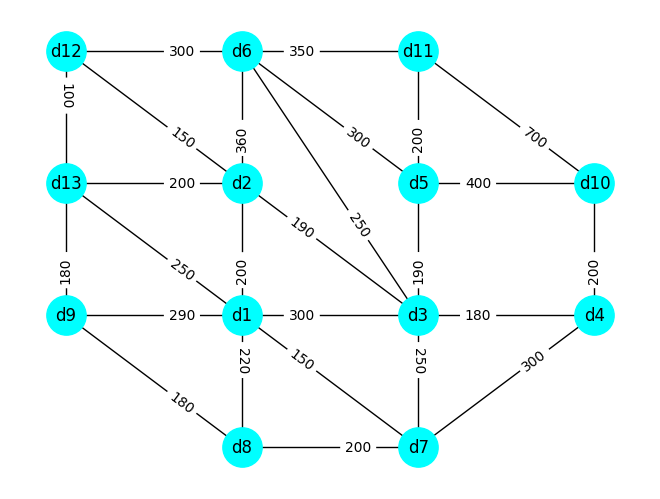

In [9]:
nx.draw(grafo, pos, node_size = 800, node_color="cyan", with_labels = True)
nx.draw_networkx_edge_labels(grafo,
                             pos,
                             edge_labels={(u, v): d for u, v, d in grafo.edges(data="weight")},
                             label_pos=.66)
plt.show()

Ploteando la Matriz de Adyacencia


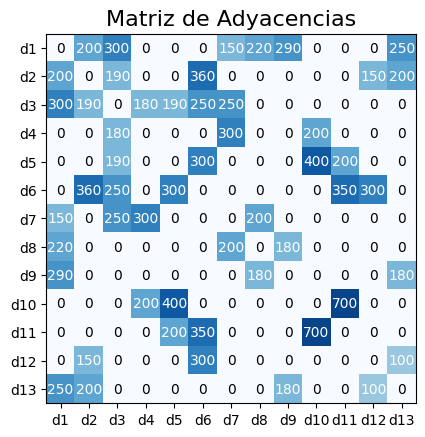

In [10]:
adj_mtx = nx.adjacency_matrix(grafo).todense()

fig, ax = plt.subplots()
bounds = [0, 10, 25, 50, 75, 100, 150, 200, 250, 300, 350, 400, 500, 750, 1000]
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
ax.imshow(adj_mtx, cmap="Blues", norm=norm)
ax.set_xticks(np.arange(len(destinos)))
ax.set_yticks(np.arange(len(destinos)))
ax.set_xticklabels(destinos)
ax.set_yticklabels(destinos)

for i in range(len(destinos)):
    for j in range(len(destinos)):
        text_color = 'black' if adj_mtx[i, j] == 0 else 'white'
        text = ax.text(j, i, adj_mtx[i, j], ha="center", va="center", color=text_color)

ax.set_title("Matriz de Adyacencias", fontsize=16)

plt.show()

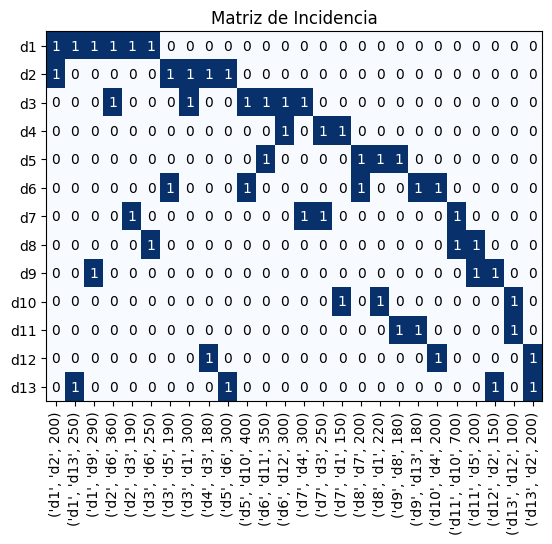

In [11]:
inc_mtx = nx.incidence_matrix(grafo).todense()

fig, ax = plt.subplots()
ax.imshow(inc_mtx, cmap="Blues",aspect="auto")
ax.set_xticks(np.arange(len(vuelos)))
ax.set_yticks(np.arange(len(destinos)))
ax.set_xticklabels(vuelos)
ax.set_yticklabels(destinos)


for i in range(len(destinos)):
    for j in range(len(vuelos)):
        text_color = 'black' if inc_mtx[i, j] == 0 else 'white'
        text = ax.text(j, i, int(inc_mtx[i, j]), ha="center", va="center", color=text_color)

ax.set_title("Matriz de Incidencia", fontsize=12)
plt.xticks(rotation=90)
plt.show()